## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merge on mouseID

mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID')



# Display the data table for preview

mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

#checking for dupe IDs

distinct_mouse = len(mouse_study['Mouse ID'].value_counts())

distinct_mouse




249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#use duplicated function- there is bad data with a mouse measured twice at one timepoint
#find any mouse that has multiple of the same timepoints
#need to look at a combination of mouse ID and timepoint


duplicates = mouse_study['Mouse ID'][mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
                         
duplicates 


908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#use .loc

dupe_mouse = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']

dupe_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']

mouse_study



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
#should end up w 248 mice and 1880 records

distinct_mouse = len(mouse_study['Mouse ID'].value_counts())

distinct_mouse


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

sum_groupby = mouse_study.groupby('Drug Regimen')

sum_mean = sum_groupby['Tumor Volume (mm3)'].mean()

sum_median = sum_groupby['Tumor Volume (mm3)'].median()

sum_var = sum_groupby['Tumor Volume (mm3)'].var()

sum_std = sum_groupby['Tumor Volume (mm3)'].std()

sum_sem = sum_groupby['Tumor Volume (mm3)'].sem()

#create df to store new variables 

tumor_stats_by_drug = pd.DataFrame({'Tumor Mean': sum_mean, 'Tumor Median': sum_median, 'Tumor Variance': sum_var, 'Tumor Std': sum_std, 'Tumor SEM': sum_sem})

tumor_stats_by_drug


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Measurements taken by Drug Regimen')

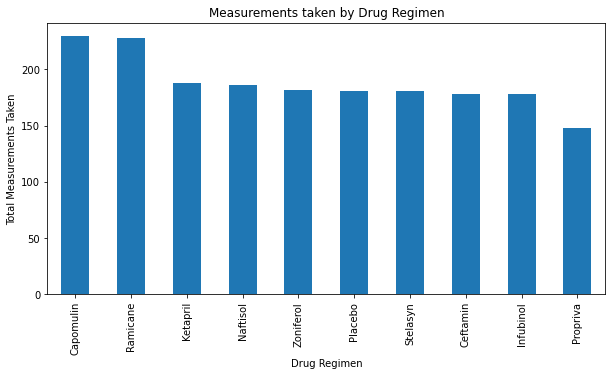

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_bar_pd = mouse_study["Drug Regimen"].value_counts()

drug_bar_pd = drug_bar_pd.plot(kind="bar", figsize=(10, 5))

drug_bar_pd.set_xlabel("Drug Regimen")

drug_bar_pd.set_ylabel("Total Measurements Taken")

drug_bar_pd.set_title("Measurements taken by Drug Regimen")



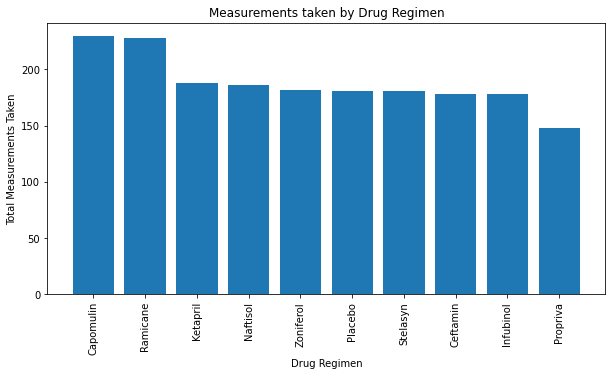

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_bar_py = mouse_study["Drug Regimen"].value_counts()

drug_regimen = mouse_study["Drug Regimen"].nunique()

x_axis = np.arange(len(drug_bar_py))


plt.figure(figsize=(10, 5))


plt.bar(x_axis, drug_bar_py)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_bar_py.index.values, rotation=90)


plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")

plt.title("Measurements taken by Drug Regimen")

plt.show()


<AxesSubplot:title={'center':'Distribution of female versus male mice'}>

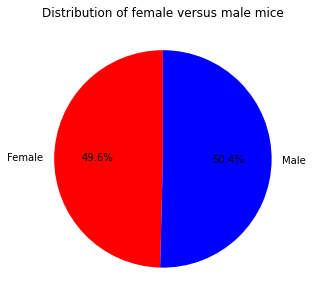

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#need to use the distinct mouse count by Sex- do not want to end up with counts of over 1800 mice, that is not accurate 
#need distinct mouse ID by Sex 

gender_mouse = mouse_study.groupby('Sex')

gender_mouse = gender_mouse["Mouse ID"].nunique()

gender_mouse

colors=["red", "blue"]

labels=["Female", "Male"]


gender_pie = gender_mouse.plot.pie(figsize=(10, 5), autopct="%1.1f%%", startangle=90, title='Distribution of female versus male mice',
                                  colors=colors, ylabel='')

gender_pie





Text(0.5, 1.0, 'Distribution of female versus male mice')

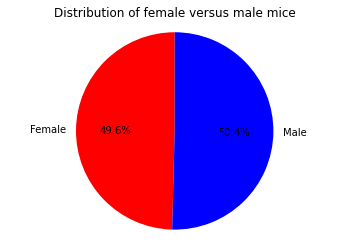

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_mouse, colors=colors, labels=labels, autopct="%1.1f%%", startangle=90)

plt.axis("equal")

plt.title("Distribution of female versus male mice")



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_tp = mouse_study.groupby(['Mouse ID'])['Timepoint'].max()

max_tp

#make this a df so that you can merge it 

max_tp = pd.DataFrame(max_tp)

max_tp




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_study_merged = max_tp.merge(mouse_study, on=['Mouse ID', 'Timepoint'])

mouse_study_merged 



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)


drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_reg: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    drug_vol = mouse_study_merged.loc[mouse_study_merged['Drug Regimen'] == drug]
    
    # add subset 
    
    tumor_data.append(drug_vol["Tumor Volume (mm3)"])
    
    
    
    # Determine outliers using upper and lower bounds

    quartiles = drug_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    


    

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile ra

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

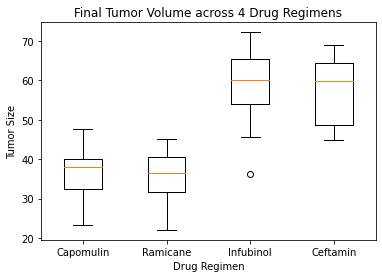

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_data, labels=drug_reg)

plt.title("Final Tumor Volume across 4 Drug Regimens")

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Size")

plt.show()



## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
